In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from dtw import dtw

plt.style.use("ggplot")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False


# 绘图
def double_bar(x1, x2, ind, width, label1, label2):
    fig = plt.figure(figsize=[10, 5])
    ax = fig.add_subplot(1, 1, 1)
    # fig, ax = plt.subplots()
    rects1 = ax.bar(
        ind,
        x1,
        width,
    )
    rects2 = ax.bar(
        ind + width,
        x2,
        width,
    )

    # 设置标签、标题和图例
    ax.set_ylabel("Avg Delay")
    ax.set_title("DT Avg Delay")
    ax.set_xticks(ind + width / 2)
    # ax.set_xticklabels(("G1", "G2", "G3", "G4", "G5"))
    ax.legend((rects1[0], rects2[0]), (label1, label2))
    return ax, rects1, rects2


# 添加数值标签
def autolabel(ax, rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{:.1f}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


def calc_indexes(sumo, ctm):
    mae = mean_absolute_error(sumo, ctm)
    mse = mean_squared_error(sumo, ctm)
    dist, cost, acc, path = dtw(
        np.array(ctm), np.array(sumo), dist=lambda x, y: np.abs(x - y)
    )

    # 打印结果
    print("MAE:", mae)
    print("MSE:", mse)
    print("DTW距离:", dist)
    # print("DTW对齐路径:", path)


def vis(sumo, ctm, time0: np.array):
    maindf = pd.DataFrame(
        {
            "sumo": sumo,
            "ctm": ctm,
            # 'time':time0
        }
    )
    print(maindf.describe())

    plt.plot(time0, sumo, label="sumo", marker=".")
    plt.plot(time0, ctm, label="og_ctm", marker=".")
    plt.legend()
    # plt.ylim(0, 30)
    plt.show()

    # # 构造数据
    width = 15  # 每个柱子的宽度

    # plt.figure(dpi=300)

    ax, rects1, rects2 = double_bar(ctm, sumo, time0, width, "ctm", "sumo")
    autolabel(ax, rects1)
    autolabel(ax, rects2)
    plt.show()

    # corr = maindf.corr()
    # print(corr)
    # sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)
    # plt.show()
    cov = maindf.cov()
    print(cov)
    sns.heatmap(cov, cmap="GnBu", annot=True, cbar=False)
    plt.show()

    sns.lmplot(data=maindf, x="ctm", y="sumo", order=1)
    plt.show()

    temp = sumo[0]
    for i in range(1, len(sumo)):
        sumo[i] += temp
        temp = sumo[i]
    temp = ctm[0]
    for i in range(1, len(ctm)):
        ctm[i] += temp
        temp = ctm[i]
    plt.plot(time0, sumo, label="sumo")
    plt.plot(time0, ctm, label="ctm")
    plt.legend()
    plt.show()


#     import numpy as np
#     ctm = np.array(ctm).reshape((-1, 1))
#     sumo = np.array(sumo)
#     from sklearn.linear_model import LinearRegression
#     model = LinearRegression()
# # 训练模型
#     model.fit(ctm, sumo)
# # 计算预测值
#     y_pred = model.predict(ctm)
# # 绘制原始数据和拟合直线
#     plt.scatter(ctm, sumo)
#     plt.plot(ctm, y_pred, color='red')
#     plt.show()
#     print(model.coef_, model.intercept_)

In [2]:
sumo_df0 = pd.read_csv("Output/experiments/7/0/sumo.csv").drop('Unnamed: 0', axis = 1)
ctm_df0 = pd.read_csv("Output/experiments/7/0/ctm.csv").drop('Unnamed: 0', axis = 1)
time_df0 = pd.read_csv("Output/experiments/7/0/time.csv").drop('Unnamed: 0', axis = 1)
des0 = sumo_df0.describe()
des0

sumo_df1 = pd.read_csv("Output/experiments/7/1/sumo.csv").drop('Unnamed: 0', axis = 1)
ctm_df1 = pd.read_csv("Output/experiments/7/1/ctm.csv").drop('Unnamed: 0', axis = 1)
time_df1 = pd.read_csv("Output/experiments/7/1/time.csv").drop('Unnamed: 0', axis = 1)
des1 = sumo_df1.describe()
des1

sumo_df2 = pd.read_csv("Output/experiments/7/2/sumo.csv").drop('Unnamed: 0', axis = 1)
ctm_df2 = pd.read_csv("Output/experiments/7/2/ctm.csv").drop('Unnamed: 0', axis = 1)
time_df2 = pd.read_csv("Output/experiments/7/2/time.csv").drop('Unnamed: 0', axis = 1)
des2 = sumo_df2.describe()
des2

,1,2,3,4
count,24.000000,24.000000,24.000000,24.000000
mean,4.722594,4.865335,5.258993,5.746533
std,0.527417,0.543868,0.673784,0.845574
min,3.874259,4.158272,4.084675,4.589201
25%,4.432942,4.504077,4.827741,5.145196
50%,4.631812,4.875504,5.323381,5.731516
75%,4.955265,4.981515,5.526270,6.164038
max,6.067943,6.607286,6.833049,8.372330


Text(0.5, 0, '元胞粒度')

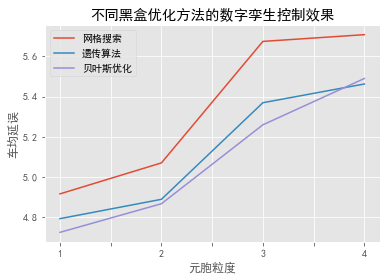

In [7]:
des2.loc["mean"][-1] = 5.49
des0.loc["mean"].plot(label='网格搜索')
des1.loc["mean"].plot(label='遗传算法')
des2.loc["mean"].plot(label='贝叶斯优化')
plt.legend()
plt.title("不同黑盒优化方法的数字孪生控制效果")
plt.ylabel("车均延误")
plt.xlabel("元胞粒度")

用贝叶斯优化，搜索最佳的x

In [11]:
sumo_dfx = pd.read_csv("Output/experiments/7/x/sumo.csv").drop('Unnamed: 0', axis = 1)
ctm_dfx = pd.read_csv("Output/experiments/7/x/ctm.csv").drop('Unnamed: 0', axis = 1)
time_dfx = pd.read_csv("Output/experiments/7/x/time.csv").drop('Unnamed: 0', axis = 1)
desx = sumo_dfx.describe()
desx

,50,100,150,200,250,300,400,500
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4.775290,4.711682,4.763077,4.870856,4.824005,4.915717,4.723818,4.859563
std,0.375761,0.485938,0.469298,0.631706,0.599518,0.528082,0.441133,0.729325
min,4.116685,3.906101,4.129960,3.896177,4.053569,4.184957,3.805059,3.874423
25%,4.549731,4.478272,4.489251,4.447908,4.456665,4.522451,4.394953,4.475790
50%,4.791542,4.573657,4.715806,4.657222,4.621763,4.771286,4.673847,4.797565
75%,4.998182,4.926914,4.890050,5.285673,5.134373,5.091662,4.903079,5.038812
max,5.696052,6.164785,6.351401,6.626097,6.212562,6.144560,5.926579,7.241243


Text(0.5, 0, '搜索次数')

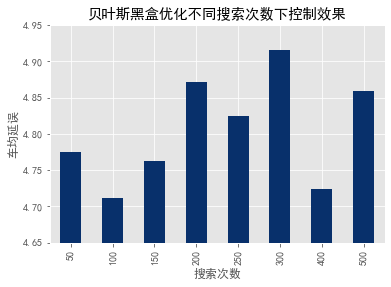

In [39]:
desx.loc['mean'].plot(
    kind='bar',
    colormap='Blues_r'
    # colormap='Greens'
)
plt.ylim([4.65,4.95])
plt.title("贝叶斯黑盒优化不同搜索次数下控制效果")
plt.ylabel("车均延误")
plt.xlabel("搜索次数")